# Project-2

# Exploratory Data Analysis


## Problem description

General goal is to track the impact of the living conditions of students aged from 15 to 22 on their math performance in order to identify students at an early stage at risk.

An approximation model must be built to predict exam mark for each student. To get a training sample it's necessary to select important features from given dataset stud_math.csv.


## Solution

### Preprocess

Import libraries and data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud = pd.read_csv('stud_math.xls')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Check how much columns have non-numerical numbers:

In [2]:
stud.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Just to prove:

In [3]:
stud.isna().sum() == stud.isnull().sum()

school                 True
sex                    True
age                    True
address                True
famsize                True
Pstatus                True
Medu                   True
Fedu                   True
Mjob                   True
Fjob                   True
reason                 True
guardian               True
traveltime             True
studytime              True
failures               True
schoolsup              True
famsup                 True
paid                   True
activities             True
nursery                True
studytime, granular    True
higher                 True
internet               True
romantic               True
famrel                 True
freetime               True
goout                  True
health                 True
absences               True
score                  True
dtype: bool

As it seen below the response for our future approximation model "score" has 6 NaNs values. However, as it known for model building response value can not be NaN or emplty (None) value. So, we can delete these rows from our dataset:

In [4]:
stud = stud[stud['score'].apply(lambda x: pd.isna(x) != True)]
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Analysis of numerical features

Let's analizy numerical columns. From problem description we know that there are only two numerical features "age" and "absences". Although many other columns contain numbers they are defined by levels, so we can say that these are discrete values. Columns with discrete values, as well as with categorical and binary values, we'll analyze later.

To find outliers let's define function of histogram and boxplot:

In [5]:
def get_hist_box(column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(stud[column])
    axes[0].set_xlabel(column)

    sns.boxplot(y=stud[column])

Build plots for our numerical columns:

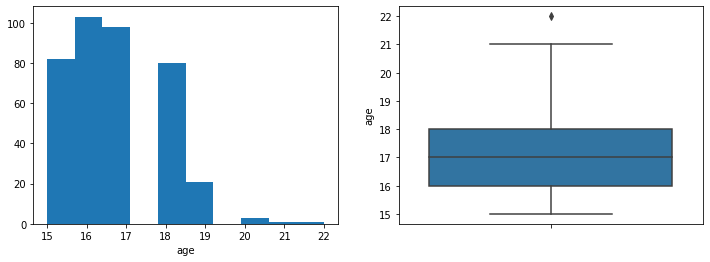

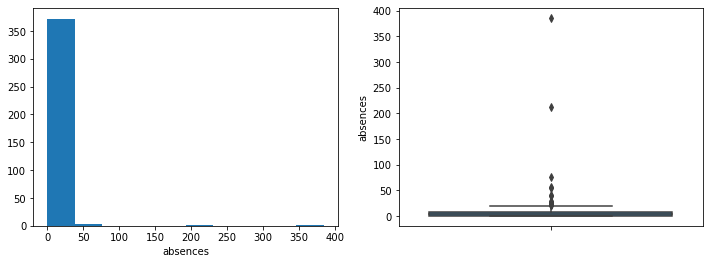

In [6]:
for column in ['age', 'absences']:
    get_hist_box(column)

It seen that there is one outlier in 'age' (22) and several in 'absences'. I would like to leave the age of 22 due to original problem statement - it says about 15 to 22 research age range.

How much outliers are in 'absences' let's see from IQR calculation:

In [7]:
Q1 = stud.absences.quantile(q=0.25, interpolation='midpoint')
Q3 = stud.absences.quantile(q=0.75, interpolation='midpoint')
IQR = Q3 - Q1
upper_outliers = stud.absences[stud.absences > Q3+1.5*IQR]
print(upper_outliers)

40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64


Only two values seem to be really outliers because the others take plausible values.

Let's check a frequency of values:

In [8]:
stud.absences.value_counts()

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Based on value_counts info I would like to delete only two outliers (212 & 385) from the columns 'absences':

In [9]:
stud = stud[(stud.absences != 212) & (stud.absences != 385)]
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


As we know from above the column 'age' has not NaNs, but the 'absences' has them.

We should replace non-numerical values and to do this let's calculate mean and median. It's not necessary to define a function because it's only a single column (later we will analyze nominative columns, so this functions can not be applied):

In [10]:
mn = stud.absences.mean()
md = stud.absences.median()
nan = stud.absences.isna().sum()
print('mean =', mn, 'median =', md, 'nan =', nan)

mean = 5.7712765957446805 median = 4.0 nan = 11


Define function that helps us to replace NaNs in columns with the necessary value: 

In [11]:
def replace_nan(column, value):
    stud[column] = stud[column].apply(lambda x: value if pd.isna(x) == True else x)

Based on mean and median values I'd like to replace NaNs in 'absences' with 5: 

In [12]:
replace_nan('absences', 5)
print(stud.absences.isna().sum())

0


### Analysis of nominative features

To start let's define value_counts function:

In [13]:
def get_value_counts(column):
    moda = stud[column].value_counts()
    nan = stud[column].isna().sum()
    print(moda, 'nan =', nan)

Use the function and analyze the result:

In [14]:
for column in stud.columns[(stud.columns != 'age') & (stud.columns != 'absences') & (stud.columns != 'score')]:
    get_value_counts(column)

GP    343
MS     44
Name: school, dtype: int64 nan = 0
F    203
M    184
Name: sex, dtype: int64 nan = 0
U    289
R     83
Name: address, dtype: int64 nan = 15
GT3    254
LE3    106
Name: famsize, dtype: int64 nan = 27
T    307
A     35
Name: Pstatus, dtype: int64 nan = 45
4.0    131
2.0     98
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64 nan = 3
2.0     104
3.0      93
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64 nan = 24
other       127
services     96
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64 nan = 19
other       194
services     98
teacher      28
at_home      16
health       15
Name: Fjob, dtype: int64 nan = 36
course        134
reputation    102
home          101
other          33
Name: reason, dtype: int64 nan = 17
mother    247
father     86
other      24
Name: guardian, dtype: int64 nan = 30
1.0    237
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64 nan = 28
2.0    187
1.0    103
3.0     63

It's clear that 'Fedu' and 'famrel' have unexpected values 40 and -1 correspondingly. Of course, these can be misprints, however, their letters are located separetely from each other on a keyboard, so I'm not sure...

I think we should remove these values from the sample:

In [15]:
stud = stud[(stud.Fedu != 40) & (stud.famrel != -1)]
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


I suppose that on this stage of course the best solution is to replace NaNs in nominative features with the most frequently value. 

To do this we need to use defined above replace_nan function (don't forget to check the size of the sample :) ):

In [16]:
for column in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
               'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
               'freetime', 'goout', 'health']:
    replace_nan(column, stud[column].value_counts().index[0])

print(stud.isna().sum())
stud

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Now we have the 'stud' dataset without NaNs and empty values. 

### Correlation analysis

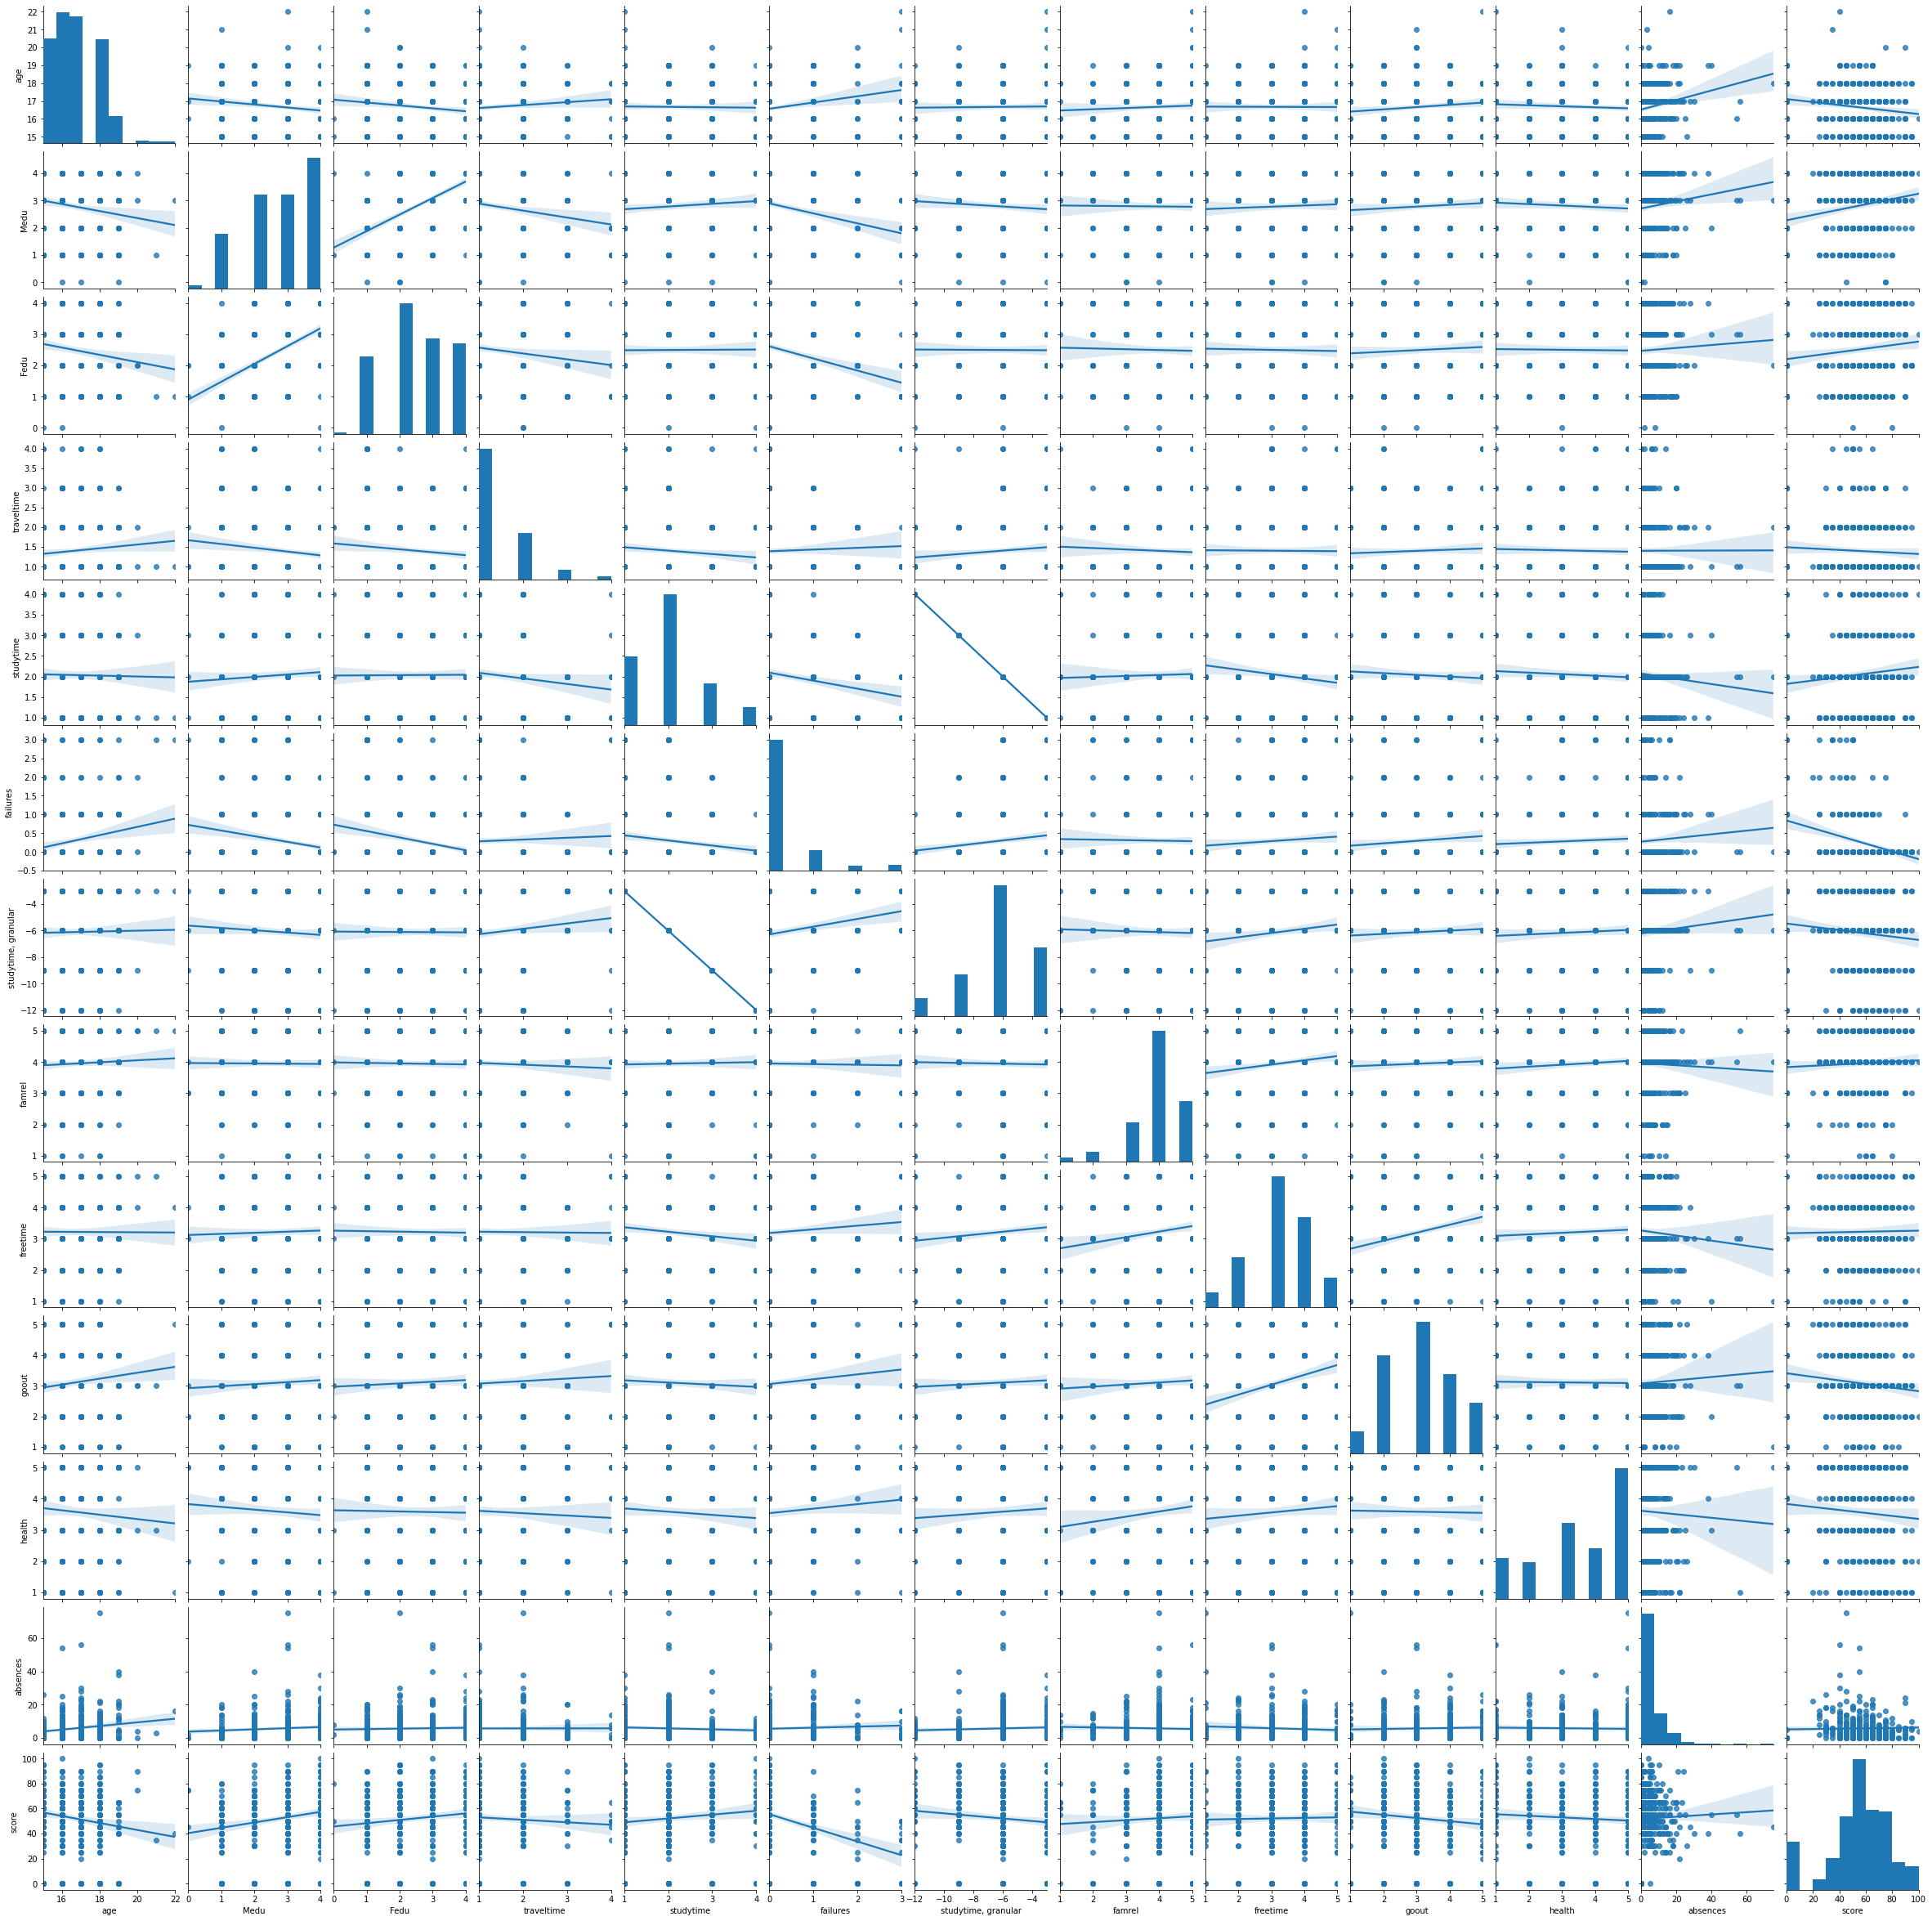

In [17]:
sns.pairplot(stud, kind='reg')

There are a lot of variables, so let's calculate correlation coefficients for numerical variables:

In [18]:
correlation = stud.corr()
correlation

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.147453,-0.137966,0.088260,-0.015813,0.196678,0.015813,0.046951,-0.004616,0.110387,-0.062797,0.171429,-0.153539
Medu,-0.147453,1.000000,0.588624,-0.156792,0.076197,-0.235308,-0.076197,-0.009148,0.039531,0.065383,-0.068544,0.094464,0.203778
Fedu,-0.137966,0.588624,1.000000,-0.118009,0.006090,-0.257776,-0.006090,-0.020340,-0.017376,0.052745,-0.014859,0.035029,0.121635
traveltime,0.088260,-0.156792,-0.118009,1.000000,-0.108564,0.045438,0.108564,-0.044756,-0.008758,0.050072,-0.036147,0.001668,-0.058396
studytime,-0.015813,0.076197,0.006090,-0.108564,1.000000,-0.163420,-1.000000,0.024272,-0.123634,-0.054532,-0.061894,-0.061054,0.112500
failures,0.196678,-0.235308,-0.257776,0.045438,-0.163420,1.000000,0.163420,-0.017092,0.084414,0.101266,0.072114,0.056123,-0.336216
"studytime, granular",0.015813,-0.076197,-0.006090,0.108564,-1.000000,0.163420,1.000000,-0.024272,0.123634,0.054532,0.061894,0.061054,-0.112500
famrel,0.046951,-0.009148,-0.020340,-0.044756,0.024272,-0.017092,-0.024272,1.000000,0.156185,0.052336,0.100456,-0.034143,0.058019
freetime,-0.004616,0.039531,-0.017376,-0.008758,-0.123634,0.084414,0.123634,0.156185,1.000000,0.287888,0.070894,-0.067001,0.019380
goout,0.110387,0.065383,0.052745,0.050072,-0.054532,0.101266,0.054532,0.052336,0.287888,1.000000,-0.014571,0.038954,-0.121971


It's seen that there is a negative correlation between 'studytime' and 'studytime, granular'.

We can delete one of them from our dataset:

In [19]:
stud = stud.drop(['studytime, granular'], axis=1)
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


For full correlation information we need to visualize an effect of each nominative feature to the response:

In [20]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

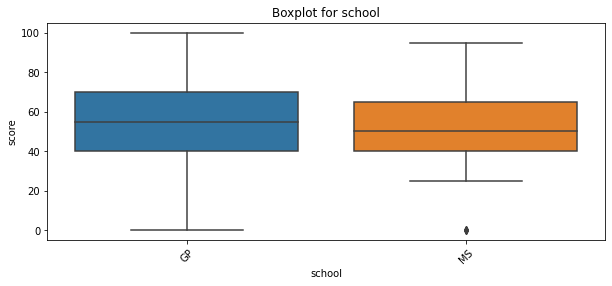

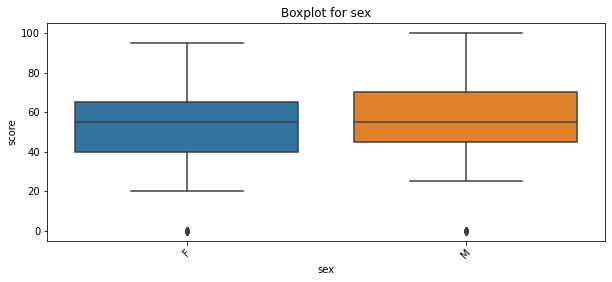

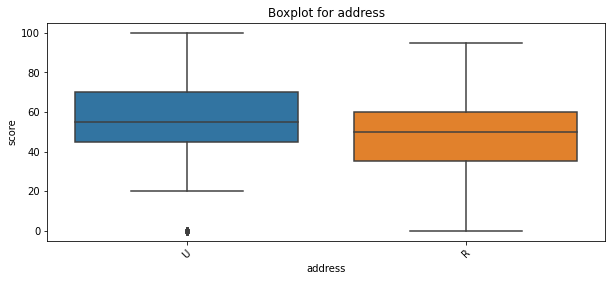

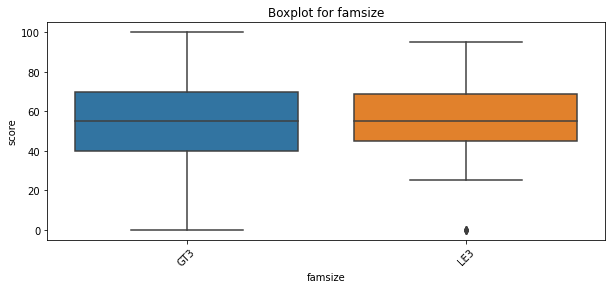

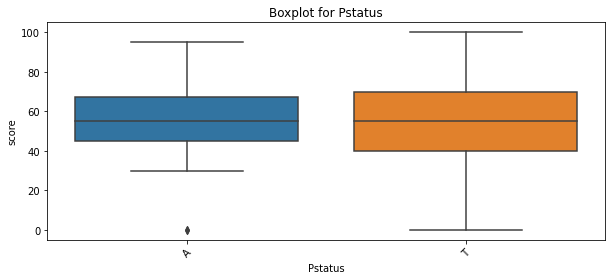

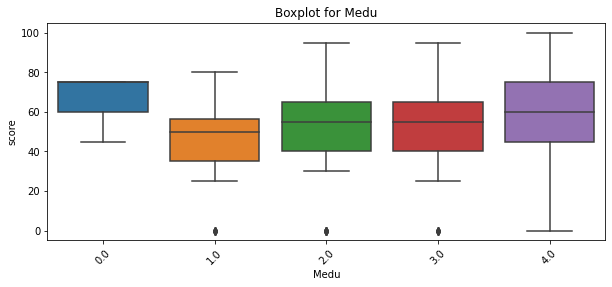

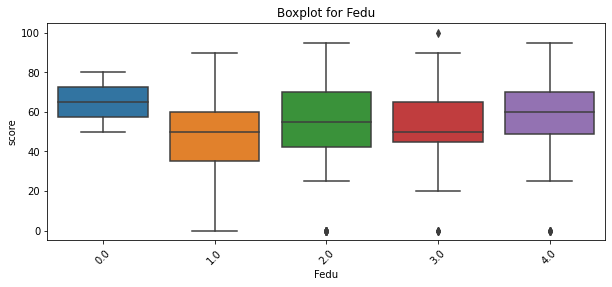

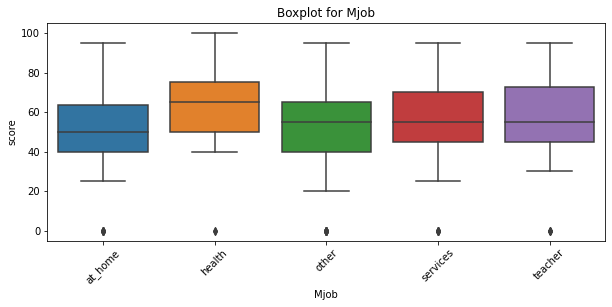

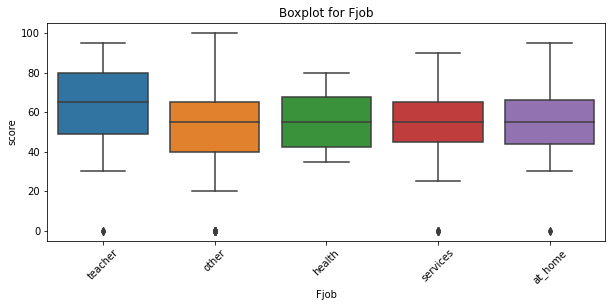

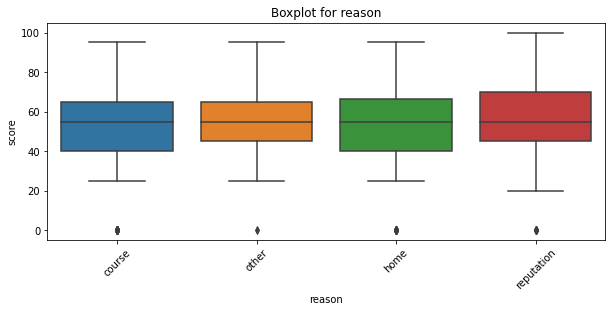

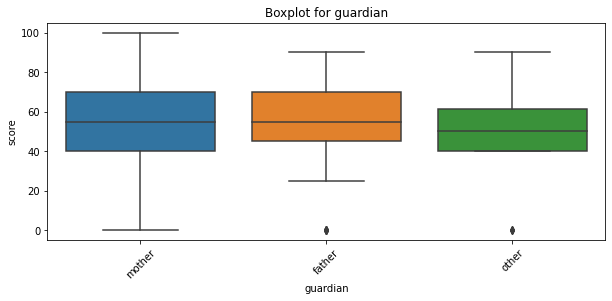

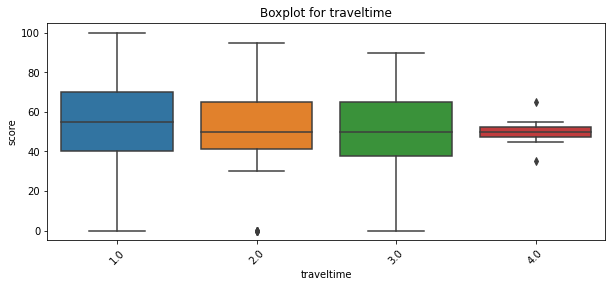

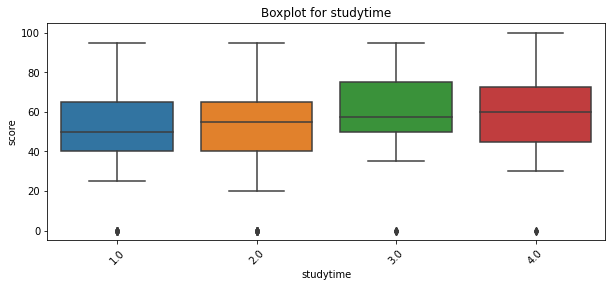

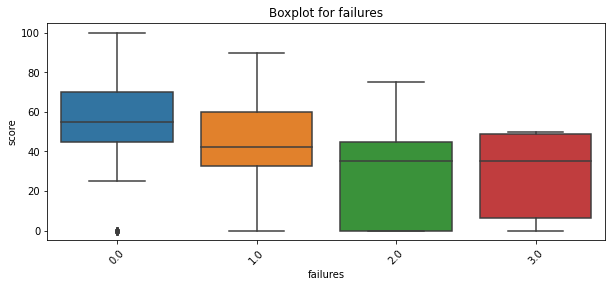

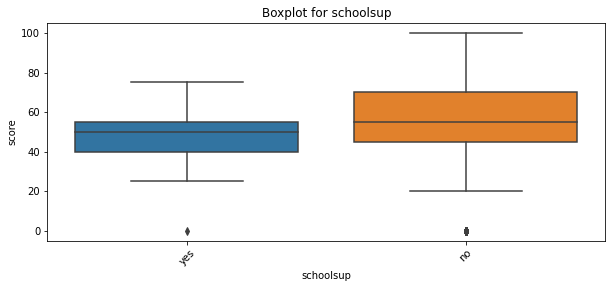

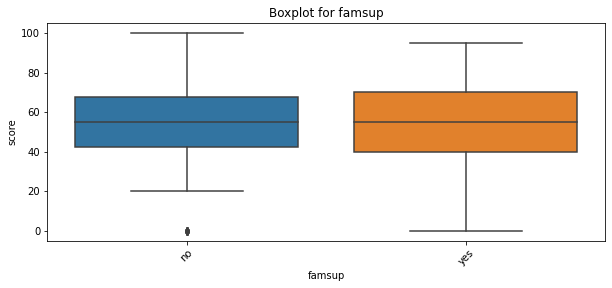

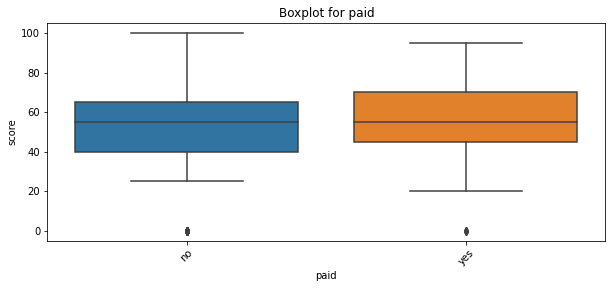

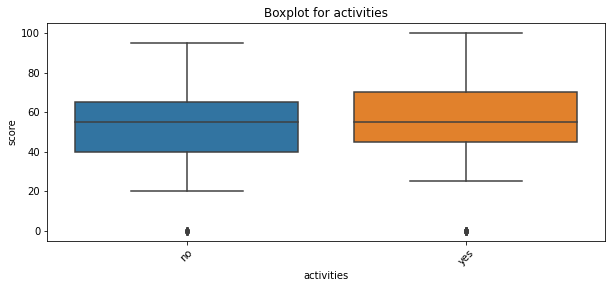

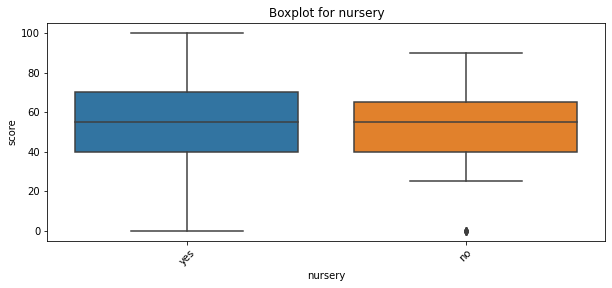

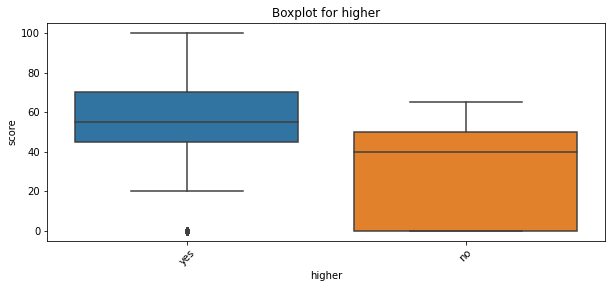

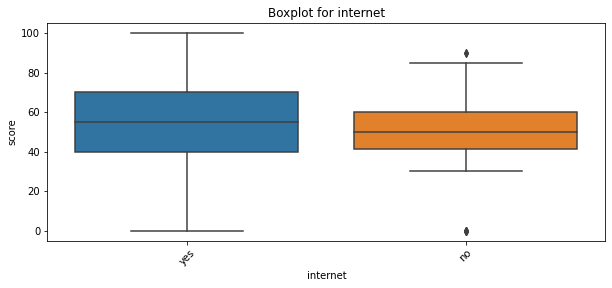

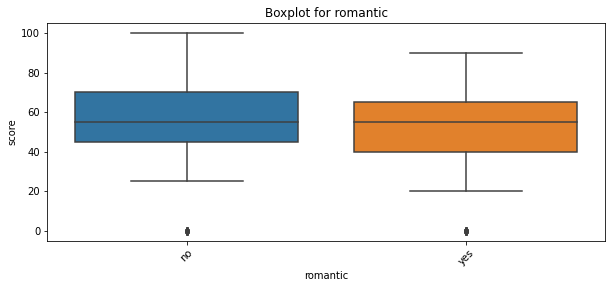

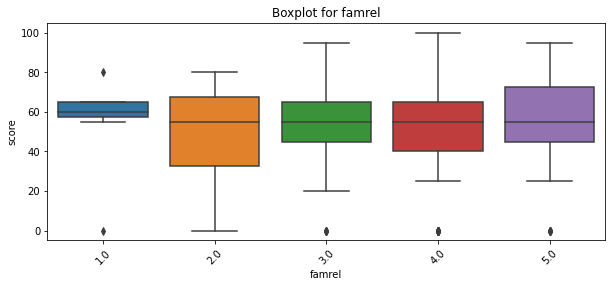

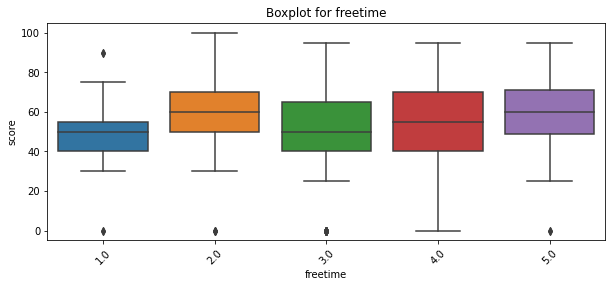

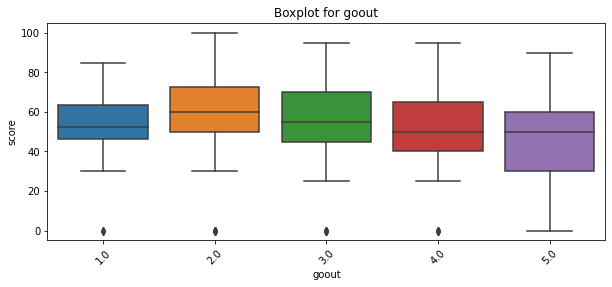

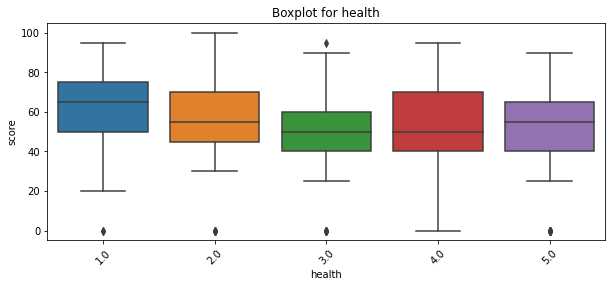

In [21]:
for column in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
               'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
               'health']:
    get_boxplot(column)

It seems each variable can impact to the 'score'.

Let's determine statistically significant differences for the columns:

In [22]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Statistically significant differences are found for column', column)
            break

In [23]:
for column in stud.columns[:-1]:
    get_stat_dif(column)

Statistically significant differences are found for column sex
Statistically significant differences are found for column address
Statistically significant differences are found for column Medu
Statistically significant differences are found for column Mjob
Statistically significant differences are found for column failures
Statistically significant differences are found for column paid
Statistically significant differences are found for column higher
Statistically significant differences are found for column romantic
Statistically significant differences are found for column absences


From the analysis of numerical columns we have two features: 'age' and 'absences'. From function above we can see that despite of 'absences' there are still 8 important features which effect the response. 

Thus, for future surrogate model building a thaining dataset looks like the following (with output column):

In [24]:
stud_for_model = stud.loc[:, ['sex', 'age', 'address', 'Medu', 'Mjob',
                              'failures', 'paid', 'higher', 'romantic', 'absences', 'score']]
stud_for_model

,sex,age,address,Medu,Mjob,failures,paid,higher,romantic,absences,score
0,F,18,U,4.0,at_home,0.0,no,yes,no,6.0,30.0
1,F,17,U,1.0,at_home,0.0,no,yes,no,4.0,30.0
2,F,15,U,1.0,at_home,3.0,no,yes,no,10.0,50.0
3,F,15,U,4.0,health,0.0,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,other,0.0,yes,yes,no,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,U,1.0,other,1.0,no,yes,no,0.0,0.0
391,M,17,U,3.0,services,0.0,no,yes,no,3.0,80.0
392,M,21,R,1.0,other,3.0,no,yes,no,3.0,35.0
393,M,18,R,3.0,services,0.0,no,yes,no,0.0,50.0
